# Project 2

## Khai báo thư viện

In [1]:
#importing the libraries
from cProfile import label
from email import message
from tkinter import messagebox
from tkinter.tix import Tree
from turtle import width
from click import command
#from cv2 import normalize
from matplotlib.pyplot import text
from tkinter import *
from tkinter import ttk
from pyparsing import col
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import statistics as sta

import pandas as pd
import numpy as np
import copy as cp
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE

## Khám phá dữ liệu

In [2]:
data = pd.read_csv('data.csv')
display(data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Thông tin dữ liệu

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [4]:
data.shape

(569, 33)

Tập dữ liệu chứa 33 biến giá trị thông tin về 569 bệnh nhân mắc bệnh ung thư vú.

## Mỗi dòng có ý nghĩa gì? 

Mỗi dòng chứa thông tin của một người dùng.

## Dữ liệu có các dòng bị lặp không?

In [5]:
if data.duplicated().any() == True:
    have_duplicated_rows = True
else:
    have_duplicated_rows = False

In [6]:
assert have_duplicated_rows == False

- Dữ liệu không có các dòng bị trùng lặp.

## Mỗi cột có bao nhiêu giá trị thiếu?

In [7]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

- Cột `Unnamed: 32` thiếu tất cả các 569 giá trị.

## Tiền xử lý dữ liệu

Xóa các cột:
- Cột `id` không có tác dụng trong việc phân loại.
- Cột `Unnamed: 32` vì chứa toàn biến rỗng.
- Cột `diagnosis` là class label, là kết quả đầu ra.

In [8]:

y = data.diagnosis                          
x = data.drop(['Unnamed: 32','id','diagnosis'],axis = 1 )
x.head()



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Khám phá dữ liệu (tiếp tục)

- Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không? 

In [9]:
x.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

- Kiểu dữ liệu thật sự của các cột có dạng object

In [10]:
def open_object_dtype(s):
    dtypes = set(s.apply(type).unique())
    return dtypes

In [11]:
for col in x.columns:
    if x[col].dtype == object:
        print(col)
        print(open_object_dtype(x[col]))

Không có cột nào có dạng object

## Tỉ lệ của đầu ra

Số lượng lành tính:  357
Số lượng ác tính :  212


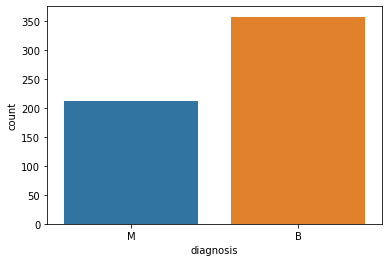

In [12]:
ax = sns.countplot(y,label="Count")      
B, M = y.value_counts()
print('Số lượng lành tính: ',B)
print('Số lượng ác tính : ',M)

Tỉ lệ đầu ra không có gì không phù hợp

## Phân tích dữ liệu

### Xử dụng bản đồ nhiệt để xét các hệ số tương quan giữa các biến trong tập dữ liệu.


<AxesSubplot:>

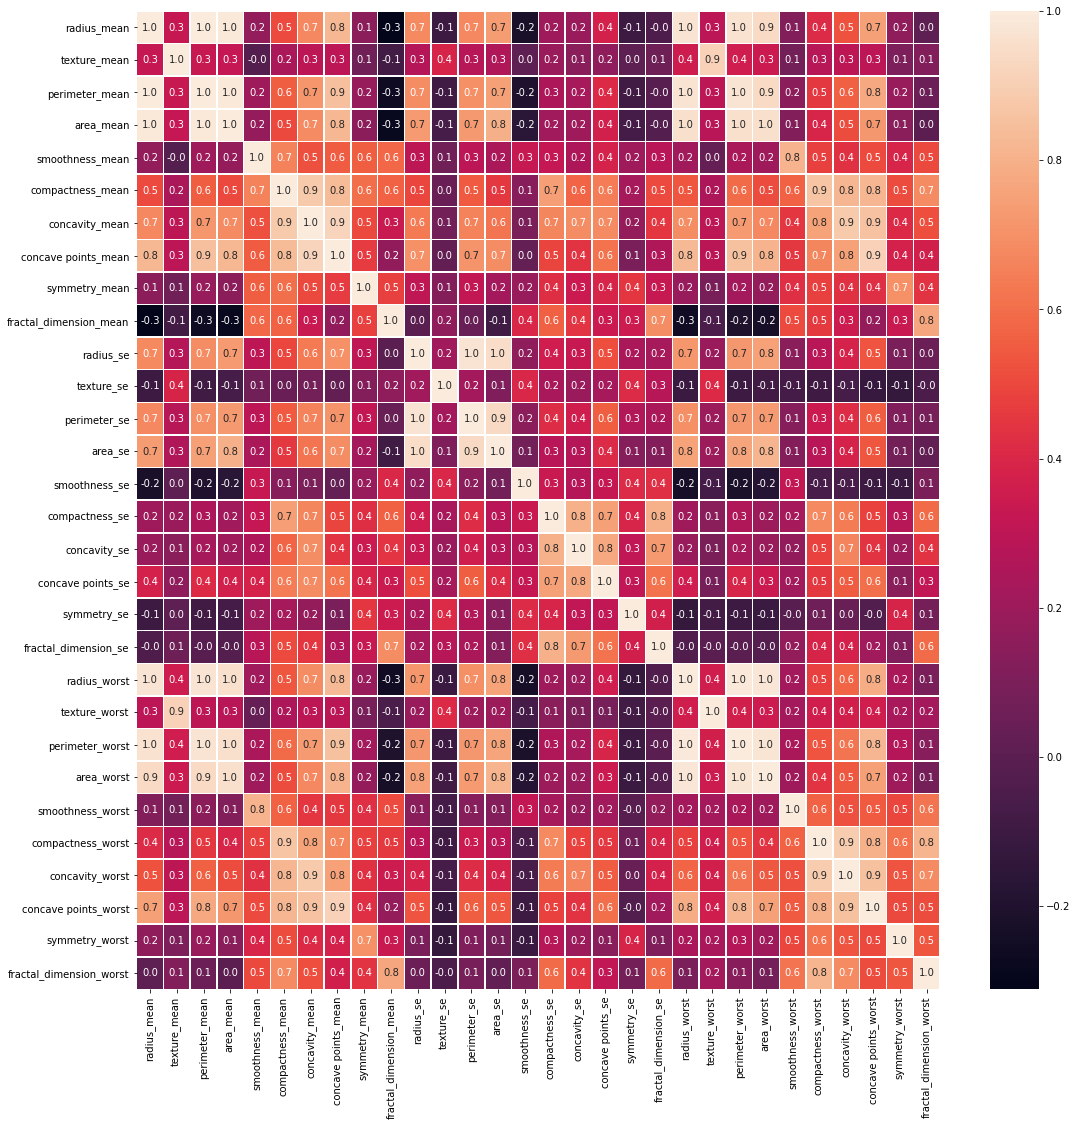

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Tiền xử lý dữ liệu

- Như có thể thấy trong bản đồ nhiệt radius_mean, perimeter_mean và area_mean có tương quan với nhau nên chúng ta sẽ chỉ sử dụng area_mean. 
- Compactness_mean, concavity_mean và concave points_mean có tương quan với nhau nên chỉ chọn concavity_mean.
- Radius_se, perimeter_se và area_se có tương quan nên chỉ sử dụng area_se.
- Radius_worst, perimeter_worst và area_worst có tương quan nên sử dụng area_worst.
- Compactness_worst, concavity_worst và concave points_worst tương quan nên sử dụng concavity_worst.
- Compactness_se, concavity_se và concave points_se tương quan nhau nên sử dụng concavity_se.
- texture_mean và texture_worst có tương quan và tôi sử dụng texture_mean.
- area_worst và area_mean có tương quan với nhau, sử dụng area_mean.

In [14]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [15]:
x_1.columns.values

array(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

## Tìm độ chính xác với những cột đã chọn

Accuracy is:  0.9649122807017544


<AxesSubplot:>

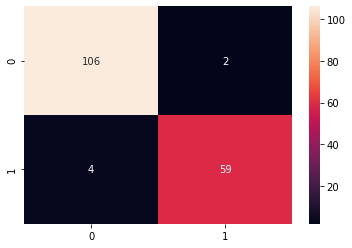

In [16]:
# Tách data train 70 % và test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier với n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Độ chính xác là hơn 96%.

## Chọn tập tính năng khác để tìm ra kết quả tốt hơn.

Sử dụng random forest để chọn ra 5 tính năng tốt nhất.

In [17]:
# Tạo đối tượng RFE và xếp hạng từng pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)
good_fea = x_train.columns[rfe.support_].values
print('5 tính năng tốt nhất được chọn bởi rfe:', good_fea)

5 tính năng tốt nhất được chọn bởi rfe: ['area_mean' 'concavity_mean' 'area_se' 'concavity_worst' 'symmetry_worst']


## Viết app bao gồm 2 tính năng Phân tích dữ liệu và Triển khai mô hình phân lớp

In [18]:
class GUI(Frame):
    def __init__(self, gui):
        self.gui=gui
        self.gui.title("app")
        self.models=["Decision tree","Naive Bayes","kNN"]
        self.choice_model=self.models[0]
        
        self.feature=None
        self.row=0

        #đọc data
        self.og_dataset = pd.read_csv('.\\data.csv')
        self.og_dataset=self.og_dataset.drop(self.og_dataset.columns[-1],1)

        self.dataPreProcessing()
        self.datasetFrame()
        self.infoFrame()
        self.generateTabs()
        # self.splitDataFrame()


    def dataPreProcessing(self):
        #tạo dataset sau khi preprocessing (good_dataset)
        self.good_dataset=cp.deepcopy(self.og_dataset)

        #data Preprocessing giải thích trong report
        choosen_fea = good_fea
        choosen_fea = np.insert(choosen_fea, 0, "diagnosis")

        self.good_features= choosen_fea
        for feature in self.og_dataset.columns:
            if feature not in self.good_features:
                self.good_dataset=self.good_dataset.drop(feature,axis=1)

        #Chia thành 2 set input (X) và actual output (Y)
        self.X = self.good_dataset.iloc[:, 1:].values
        self.Y = self.good_dataset.iloc[:,0].values

        #Số hóa Y (M là 1 ; B là 0)
        labelencoder_Y = LabelEncoder()
        self.Y = labelencoder_Y.fit_transform(self.Y)
    
        #Normalization
        self.min_v=[]
        self.max_v=[]
        for col in self.good_dataset.columns[1:]:
            self.min_v.append(self.good_dataset[col].min())
            self.max_v.append(self.good_dataset[col].max())

        for i in range(len(self.X)):
            for j in range(len(self.X[i])):
                self.X[i][j]=(self.X[i][j]-self.min_v[j])/(self.max_v[j]-self.min_v[j])
 

    def datasetFrame(self):
        tree_frame=Frame(self.gui)
        tree_frame.grid(row=self.row,column=0)
        self.row+=1

        self.treeDataset = ttk.Treeview(tree_frame,height=4)

        self.treeDataset["columns"] = tuple(self.og_dataset.columns)
        self.treeDataset["show"]='headings'

        for i in range(len(self.og_dataset.columns)):
            self.treeDataset.column(self.treeDataset["columns"][i], stretch=True,width=15,minwidth=140,anchor=CENTER)
            self.treeDataset.heading(self.treeDataset["columns"][i], text=self.treeDataset["columns"][i])

        vertical_scroll = ttk.Scrollbar(tree_frame, orient=VERTICAL)
        vertical_scroll.configure(command=self.treeDataset.yview)
        self.treeDataset.configure(yscrollcommand=vertical_scroll.set)
        
        horizontal_scroll = ttk.Scrollbar(tree_frame, orient=HORIZONTAL)
        horizontal_scroll.configure(command=self.treeDataset.xview)
        self.treeDataset.configure(xscrollcommand=horizontal_scroll.set)

        self.treeDataset.grid(row=0,column=0)
        vertical_scroll.grid(row=0,column=1,sticky=N+S)
        horizontal_scroll.grid(row=1,column=0,sticky=W+E)

        rows_data=self.og_dataset.values.tolist()
        for row in rows_data:
            self.treeDataset.insert('','end',values=(row))


    def infoFrame(self):
        self.frame_info=LabelFrame(self.gui,padx=5,pady=5,text="Introduction")
        self.frame_info.grid(row=self.row,column=0,sticky=W+E)
        self.row+=1

        lb_intro=Label(self.frame_info,text="Breast Cancer Wisconsin (Diagnostic) Data Set")
        lb_intro.grid(row=0,column=0,sticky=W)

        lb_no_items=Label(self.frame_info,text="Total %s items" % self.og_dataset.shape[0],fg='red')
        lb_no_items.grid(row=1,column=0,sticky=W)
        no_M=len(self.og_dataset[self.og_dataset["diagnosis"]=='M'])

        frame=Frame(self.frame_info)
        frame.grid(row=2,column=0,sticky=W)

        lb_no_M=Label(frame,text="Malignant: %s items" % no_M,fg='red')
        lb_no_M.grid(row=0,column=0,sticky=W)

        rigid_frame=Frame(frame,width=20)
        rigid_frame.grid(row=0,column=1)

        no_B=self.og_dataset.shape[0]-no_M
        lb_no_B=Label(frame,text="Benign: %s items" % no_B,fg='red')
        lb_no_B.grid(row=0,column=2,sticky=W)
    

    def generateTabs(self):
        self.tabs=ttk.Notebook(self.gui, style='lefttab.TNotebook')

        self.visualizeFrame()
        self.predictFrame()

        self.tabs.grid(row=self.row,column=0,sticky=N+S+W+E,pady=10)
        self.row+=1
    
    
    def statisticsFrame(self,statistics):
        frame_statistics=LabelFrame(self.visualize,text="Statistics",padx=5,pady=5)
        frame_statistics.grid(row=1,column=0,sticky=NSEW)
        lb_max=Label(frame_statistics,text="Max:    %s" % round(statistics["max"],3))
        lb_max.grid(row=0,column=0,sticky=W)

        lb_min=Label(frame_statistics,text="Min:    %s" % round(statistics["min"],3))
        lb_min.grid(row=1,column=0,sticky=W)

        lb_mean=Label(frame_statistics,text="Mean:  %s" % round(statistics["mean"],3))
        lb_mean.grid(row=2,column=0,sticky=W)

        lb_standard=Label(frame_statistics,text="Standard:  %s" % round(statistics["std"],3))
        lb_standard.grid(row=3,column=0,sticky=W)

        lb_variance=Label(frame_statistics,text="Variance: %s" %round(sta.variance(self.og_dataset[self.feature]),3))
        lb_variance.grid(row=4,column=0,sticky=W)
    

    def modelingFrame(self):
        frame_modeling=LabelFrame(self.visualize,text="Modeling",padx=5,pady=5)
        frame_modeling.grid(row=1,column=1,sticky=NSEW)

        def lineChart():
            plt.close()
            plt.plot(self.og_dataset[self.feature], linestyle = 'dotted')
            tilte = 'Line chart biểu diễn cho ' + self.feature
            plt.title(tilte)
            plt.xlabel('Number of values')
            plt.ylabel('Distribution')
            plt.show()

        def histogram():
            plt.close()
            plt.hist(self.og_dataset[self.feature], edgecolor= 'black')
            tilte = 'Histogram chart biểu diễn cho ' + self.feature
            plt.title(tilte)
            plt.xlabel('Distribution')
            plt.ylabel('Frequency')
            plt.axvline(self.og_dataset[self.feature].mean(), color='orange', label=f"Mean:{round(self.og_dataset[self.feature].mean(),3)}")
            plt.axvline(self.og_dataset[self.feature].median(), color='red', label= f"Median: {self.og_dataset[self.feature].median()}")
            plt.legend(loc='best')
            plt.show()

        def boxChart():
            plt.close()
            sns.set_theme(style="whitegrid")
            title = 'Box plot biểu diễn cho ' + self.feature
            ax = sns.boxplot(x=self.og_dataset[self.feature]).set(title=title)
            plt.show()

        #Line chart
        btn_line_chart=Button(frame_modeling,text="Line Chart",width=10,command=lineChart)
        btn_line_chart.grid(row=0,column=0)

        #Bar chart
        btn_bar_chart=Button(frame_modeling,text="Histogram",width=10,command=histogram)
        btn_bar_chart.grid(row=1,column=0)

        #Box chart
        btn_box_chart=Button(frame_modeling,text="Box Chart",width=10,command=boxChart)
        btn_box_chart.grid(row=2,column=0)


    def visualizeFrame(self):
        self.visualize=Frame(self.tabs,padx=10,pady=10)
        self.visualize.grid(row=0,column=0,sticky=N+S+W+E)
        self.tabs.add(self.visualize, text='Visualization')

        lb_instruct=Label(self.visualize,text="To get the specific attribute modeling and statistics, double click on \nthe property you want (header of the top data table)",fg="red")
        lb_instruct.pack(fill="both",expand=True)

        def click_tree(event):
            region = self.treeDataset.identify("region", event.x, event.y)
            if region == "heading":
                column = int(self.treeDataset.identify_column(event.x)[1:])-1
                if column<=1:
                    messagebox.showwarning("Warning","Cannot analysis features: ID, diagnosis")
                    return

                lb_instruct.destroy()
                self.feature = self.og_dataset.columns[column]

                statistics=self.og_dataset.describe()[self.feature]

                label=Label(self.visualize,text="%s" % self.feature,fg="red")
                label.grid(row=0,column=0,sticky=W)
                self.statisticsFrame(statistics)
                self.modelingFrame()

        self.treeDataset.bind("<Double-1>", click_tree)

    
    def inputFrame(self):
        frame_input_data=LabelFrame(self.exe_frame,text="Input Data",padx=5,pady=5)
        frame_input_data.grid(row=0,column=0,sticky=N)
        #self.good_features=["diagnosis","area_mean", "concavity_mean", "area_se", "concavity_worst", "symmetry_worst"]
        lb_area_mean=Label(frame_input_data,text=good_fea[0])
        lb_area_mean.grid(row=0,column=0,pady=2,stick=W)

        lb_concavity_mean=Label(frame_input_data,text=good_fea[1])
        lb_concavity_mean.grid(row=1,column=0,pady=2,stick=W)

        lb_area_se=Label(frame_input_data,text=good_fea[2])
        lb_area_se.grid(row=2,column=0,pady=2,stick=W)

        lb_concavity_worst=Label(frame_input_data,text=good_fea[3])
        lb_concavity_worst.grid(row=3,column=0,pady=2,stick=W)

        lb_symmetry_worst=Label(frame_input_data,text=good_fea[4])
        lb_symmetry_worst.grid(row=4,column=0,pady=2,stick=W)

        self.content_area_mean=StringVar()
        self.entry_area_mean=Entry(frame_input_data,textvariable=self.content_area_mean,width=6)
        self.entry_area_mean.grid(row=0,column=1,pady=2)

        self.content_concavity_mean=StringVar()
        self.entry_concavity_mean=Entry(frame_input_data,textvariable=self.content_concavity_mean,width=6)
        self.entry_concavity_mean.grid(row=1,column=1,pady=2)

        self.content_area_se=StringVar()
        self.entry_area_se=Entry(frame_input_data,textvariable=self.content_area_se,width=6)
        self.entry_area_se.grid(row=2,column=1,pady=2)

        self.content_concavity_worst=StringVar()
        self.entry_concavity_worst=Entry(frame_input_data,textvariable=self.content_concavity_worst,width=6)
        self.entry_concavity_worst.grid(row=3,column=1,pady=2)
        
        self.content_symmetry_worst=StringVar()
        self.entry_symmetry_worst=Entry(frame_input_data,textvariable=self.content_symmetry_worst,width=6)
        self.entry_symmetry_worst.grid(row=4,column=1,pady=2)


    def configureFrame(self):
        frame_configure=LabelFrame(self.exe_frame,text="Config",padx=5,pady=5)
        frame_configure.grid(row=0,column=1,sticky=N,padx=10)

        #Combobox Frame
        self.frame_cbb=Frame(frame_configure,padx=5,pady=5)
        self.frame_cbb.grid(row=1,column=0)

        lb_cbb=Label(self.frame_cbb,text="Choose model ")
        lb_cbb.grid(row=0,column=0)

        self.choice_model = StringVar()
        self.cbb_model = ttk.Combobox(self.frame_cbb, textvariable=self.choice_model, state='readonly', width=14)
        self.cbb_model['state'] = 'readonly'
        self.cbb_model['values']=self.models
        self.cbb_model.current(0)
        self.cbb_model.grid(row=0,column=1,padx=5)
   
        #adjust Frame
        self.frame_adjust=Frame(frame_configure,padx=5,pady=5)
        self.frame_adjust.grid(row=2,column=0,sticky=W)

        ratio1=Label(self.frame_adjust,text="Ratio(test)")
        ratio1.grid(row=0,column=0)

        frame_rigid=Frame(self.frame_adjust,width=9)
        frame_rigid.grid(row=0,column=1)

        self.entry_ratio=Entry(self.frame_adjust,width=6)
        self.entry_ratio.grid(row=0,column=2)

        frame_rigid=Frame(self.frame_adjust,width=14)
        frame_rigid.grid(row=0,column=3)

        #additional model
        self.kNNFrame()
        self.DecisionTreeFrame()
        self.frame_decision_tree.grid(row=0,column=4)

        def changeCbb(event=None):
            if self.choice_model.get()==self.models[2]:
                self.frame_decision_tree.grid_forget()
                self.frame_kNN.grid(row=0,column=4)
            elif self.choice_model.get()==self.models[0]:
                self.frame_kNN.grid_forget()
                self.frame_decision_tree.grid(row=0,column=4)
            else:
                self.frame_decision_tree.grid_forget()
                self.frame_kNN.grid_forget()

        self.cbb_model.bind('<<ComboboxSelected>>', changeCbb)


    def predictFrame(self):
        self.predict=Frame(self.tabs,padx=5,pady=5)
        self.predict.grid(row=0,column=0,sticky=N+S+W+E)
        self.tabs.add(self.predict, text='Prediction')
        
        tutorial_frame=Frame(self.predict,padx=5,pady=5)
        tutorial_frame.grid(row=0,column=0,sticky=W)
        lb_instruct_predict=Label(tutorial_frame,text="1. Predict: Enter all the data you need to predict on the left then select the model and",fg="red")
        lb_instruct_predict.grid(row=0,column=0,sticky=W)

        lb_instruct_predict2=Label(tutorial_frame,text="configuration on the right, finally click Predict",fg="red")
        lb_instruct_predict2.grid(row=1,column=0,sticky=W)
        
        lb_instruct_evaluate=Label(tutorial_frame,text="2. Evaluate: Select the model and configuration on the right, finally click Evaluate Model",fg="blue")
        lb_instruct_evaluate.grid(row=2,column=0,sticky=W)

        self.exe_frame=Frame(self.predict,padx=5,pady=5)
        self.exe_frame.grid(row=1,column=0)

        self.inputFrame()
        self.configureFrame()

        frame_buttons=Frame(self.predict,padx=5,pady=5)
        frame_buttons.grid(row=2,column=0)

        self.btn_predict=Button(frame_buttons,text="Predict",command=self.runPredict)
        self.btn_predict.grid(row=0,column=0)

        self.btn_predict=Button(frame_buttons,text="Evaluate Model",command=self.runEvaluate)
        self.btn_predict.grid(row=0,column=1)
    

    def kNNFrame(self):
        self.frame_kNN=Frame(self.frame_adjust)

        lb_k=Label(self.frame_kNN,text="K")
        lb_k.grid(row=0,column=0)

        frame_rigid=Frame(self.frame_kNN,width=9)
        frame_rigid.grid(row=0,column=1)

        self.entry_k=Entry(self.frame_kNN,width=6)
        self.entry_k.grid(row=0,column=2)


    def DecisionTreeFrame(self):
        self.frame_decision_tree=Frame(self.frame_adjust)

        lb_method=Label(self.frame_decision_tree,text="Method")
        lb_method.grid(row=0,column=0)

        frame_rigid=Frame(self.frame_decision_tree,width=9)
        frame_rigid.grid(row=0,column=1)

        self.choice_tree_method = StringVar()
        cbb_tree_method = ttk.Combobox(self.frame_decision_tree, textvariable=self.choice_tree_method, state='readonly', width=8)
        cbb_tree_method['state'] = 'readonly'
        cbb_tree_method['values']=["entropy","gini"]
        cbb_tree_method.current(0)
        cbb_tree_method.grid(row=0,column=2)
    

    def inputNormalize(self):
        inputData = [float(self.content_area_mean.get()),float(self.content_concavity_mean.get()),float(self.content_area_se.get()),float(self.content_concavity_worst.get()),float(self.content_symmetry_worst.get())]
        inputDataAfterNorm=[]
        temp_min_v=cp.deepcopy(self.min_v)
        temp_max_v=cp.deepcopy(self.max_v)

        for i in range(len(temp_min_v)):
            if temp_min_v[i] > inputData[i]:
                temp_min_v[i]=inputData[i]
            if temp_max_v[i] < inputData[i]:
                temp_max_v[i]=inputData[i]
            inputDataAfterNorm.append((inputData[i]-temp_min_v[i])/(temp_max_v[i]-temp_min_v[i]))    

        return np.array(np.array([inputDataAfterNorm]))
    

    def trainModel(self,X_train,Y_train):
        #train model
        if self.choice_model.get()==self.models[1]: #Naive Bayes
            classifier = GaussianNB()
            classifier.fit(X_train, Y_train)
        elif self.choice_model.get()==self.models[0]: #Decision Tree
            classifier = DecisionTreeClassifier(criterion = self.choice_tree_method.get(), random_state = 0)
            classifier.fit(X_train, Y_train)
        elif self.choice_model.get()==self.models[2]: #kNN
            if self.entry_k.get()=="":
                messagebox.showwarning("Warning","k is empty")
                return
            classifier = KNeighborsClassifier(n_neighbors = int(self.entry_k.get()), p = 2)
            classifier.fit(X_train, Y_train)
            
        if self.choice_model.get()==self.models[1]: #Naive Bayes
            classifier = GaussianNB()
            classifier.fit(X_train, Y_train)
        elif self.choice_model.get()==self.models[0]: #Decision Tree
            classifier = DecisionTreeClassifier(criterion = self.choice_tree_method.get(), random_state = 0)
            classifier.fit(X_train, Y_train)
        elif self.choice_model.get()==self.models[2]: #kNN
            if self.entry_k.get()=="":
                messagebox.showwarning("Warning","k is empty")
                return
            classifier = KNeighborsClassifier(n_neighbors = int(self.entry_k.get()), p = 2)
            classifier.fit(X_train, Y_train)
        
        return classifier


    def runPredict(self):
        if self.content_area_mean.get()=="" or self.content_area_se.get()=="" or self.content_concavity_mean.get()=="" or self.content_concavity_worst.get()=="" or self.content_symmetry_worst.get()=="":
            messagebox.showwarning("Warning","Not filled in enough data")
            return

        if self.entry_ratio.get()=="":
            messagebox.showwarning("Warning","Ratio is empty")
            return

        ###Model Trainning###
        #Chia train và test user nhập
        X_train, X_test, Y_train, Y_test = train_test_split(self.X, self.Y, test_size = float(self.entry_ratio.get()) , random_state = 0)

        #train model
        classifier=self.trainModel(X_train,Y_train)

        #Normalize inputData
        inputData=self.inputNormalize()

        ###Predict data###
        result=classifier.predict(inputData)[0]

        if result==1:
            messagebox.showwarning("Finish","Malignant")
        else:
            messagebox.showinfo("Finish","Benign")

    def evaluateFrame(self,confuseMatrix):
        form_evaluate=Toplevel()
        form_evaluate.title(self.choice_model.get()+" (ratio %s)" % self.entry_ratio.get())

        self.frame_evaluate=LabelFrame(form_evaluate,text="Evaluation")
        self.frame_evaluate.grid(row=0,column=0)

        self.cfMatrixFrame(confuseMatrix[0,0],confuseMatrix[0,1],confuseMatrix[1,0],confuseMatrix[1,1])
        self.measuremenframe(confuseMatrix[0,0],confuseMatrix[0,1],confuseMatrix[1,0],confuseMatrix[1,1])


    def cfMatrixFrame(self,TP,FN,FP,TN):
        frame_matrix=Frame(self.frame_evaluate,padx=5,pady=5)
        frame_matrix.grid(row=0,column=0)
        
        lb_confuse_matrix=Label(frame_matrix,text="Confuse matrix",fg="red")
        lb_confuse_matrix.grid(row=0,column=0,sticky=W)

        confuseMatrix = ttk.Treeview(frame_matrix, columns=('predict B', 'predict M'),height=2)

        confuseMatrix.column("#0", width=80)
        confuseMatrix.heading("#0")

        confuseMatrix.column(confuseMatrix["columns"][0],width=80)
        confuseMatrix.heading(confuseMatrix["columns"][0], text=confuseMatrix["columns"][0])

        confuseMatrix.column(confuseMatrix["columns"][1],width=80)
        confuseMatrix.heading(confuseMatrix["columns"][1], text=confuseMatrix["columns"][1])

        confuseMatrix.insert('','end',text="Actual B",values=(TP,FN,))
        confuseMatrix.insert('','end',text="Actual M",values=(FP,TN,))

        confuseMatrix.grid(row=1,column=0)
    

    def measuremenframe(self,TP,FN,FP,TN):
        frame_evaluate=Frame(self.frame_evaluate,padx=5,pady=5)

        lb=Label(frame_evaluate,text="Measurements",fg="red")
        lb.grid(row=0,column=0)

        lb_accuracy=Label(frame_evaluate,text="Accuracy: %s" % str(round((TP+TN)/(TP+TN+FP+FN),3)))
        lb_accuracy.grid(row=1,column=0)
        
        frame_rigid=Frame(frame_evaluate,width=50)
        frame_rigid.grid(row=1,column=1)

        lb_error_rate=Label(frame_evaluate,text="Error rate: %s" % str(round((FP+FN)/(TP+TN+FP+FN),3)))
        lb_error_rate.grid(row=1,column=1)

        lb_sensitivity=Label(frame_evaluate,text="Sensitivity: %s" % str(round(TP/(TP+FN),3)))
        lb_sensitivity.grid(row=2,column=0)

        lb_specificity=Label(frame_evaluate,text="Specificity: %s" % str(round(TN/(TN+FP),3)))
        lb_specificity.grid(row=2,column=1)

        lb_precision=Label(frame_evaluate,text="Precision: %s" % str(round(TP/(TP+FP),3)))
        lb_precision.grid(row=3,column=0)

        lb_recall=Label(frame_evaluate,text="Recall: %s" % str(round(TP/(TP+FN),3)))
        lb_recall.grid(row=3,column=1)

        frame_evaluate.grid(row=0,column=1,padx=5,pady=5)


    def runEvaluate(self):
        if self.entry_ratio.get()=="":
            messagebox.showwarning("Warning","Ratio is empty")
            return
        ###Model Trainning###
        #Chia train và test user nhập
        X_train, X_test, Y_train, Y_test = train_test_split(self.X, self.Y, test_size = float(self.entry_ratio.get()) , random_state = 0)

        #train model
        classifier=self.trainModel(X_train,Y_train)

        ###evaluate###
        Y_predict=classifier.predict(X_test)
        confuseMatrix = confusion_matrix(Y_test, Y_predict)
        self.evaluateFrame(confuseMatrix)
        print(confuseMatrix)
        # print((confuseMatrix[0,0]+confuseMatrix[1,1])/(confuseMatrix[0,0]+confuseMatrix[0,1]+confuseMatrix[1,1]+confuseMatrix[1,0]))



if __name__=="__main__":
    gui=Tk()
    app=GUI(gui)
    gui.mainloop()